In [2]:
# Matplotlib dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
# Import standard dependencies - NymPy and Pandas
import numpy as np
import pandas as pd

In [4]:
# Import Datetime dependencies
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# Set up ability to query SQLite database
engine = create_engine("sqlite:///hawaii.sqlite")

# Create base class
Base = automap_base()

In [7]:
# Reflect an existing database into a new model
# Reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5, 0, 'Date')

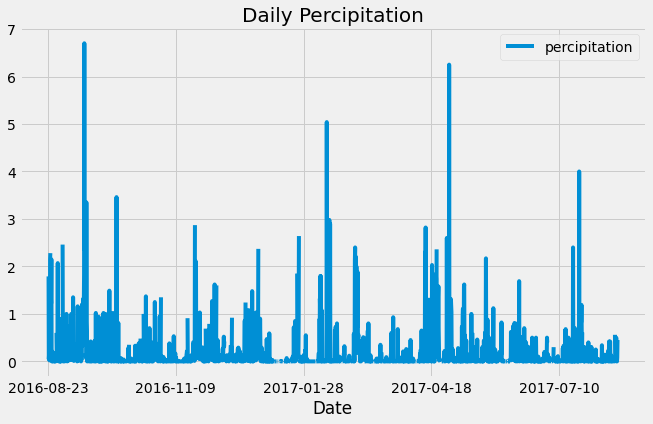

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the last data point in the database (year, month, date). 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = [] # creates variable to store results
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all() # filter out all data that is older than a year fromt he last record date 

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','percipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True) # sets our index to the date column
df = df.sort_index() # sorts by date
# print(df.to_string(index=False)) -- to pritn without the index column

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10, 6))
plt.title("Daily Percipitation", fontsize=20)
plt.xlabel("Date")


In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


In [19]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [27]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

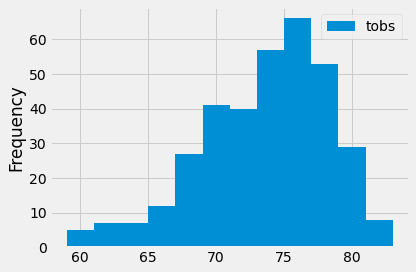

In [41]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# convert the results to a DataFrame
df = pd.DataFrame(results, columns=['tobs'])

# plot the results as a histogram
df.plot.hist(bins=12)
plt.tight_layout()

In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge